In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from google.colab import files
uploaded = files.upload()


Saving bank-additional-full_cleaned.csv to bank-additional-full_cleaned.csv


In [2]:
from glob import glob # list all the files that matches the patterns and sort the results
bank= pd.read_csv('bank-additional-full_cleaned.csv')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


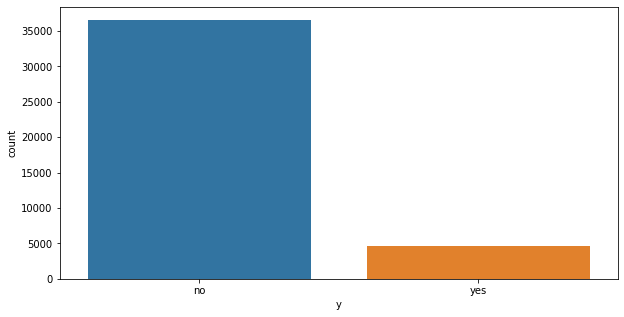

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(bank.y)
plt.show()

In [6]:
!pip install imbalanced-learn

In [7]:

bank.shape
bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
# class count
y_count_no, y_count_true = bank['y'].value_counts()

# divie class
y_no = bank[bank['y'] == "no"]
y_true = bank[bank['y'] == "yes"]

In [9]:
print('class no:', y_no.shape)
print('\nclass yes:', y_true.shape)

class no: (36548, 21)

class yes: (4640, 21)


# **Method -1** : Re-sampling - over sampling

total class of 1 and 0:
 yes    36548
no     36548
Name: y, dtype: int64


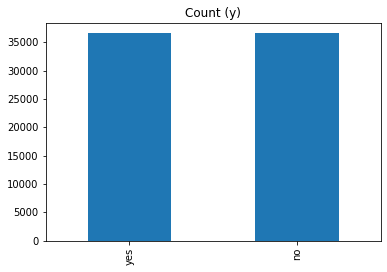

In [10]:
y_true_over = y_true.sample(y_count_no, replace = True)

test_over = pd.concat([y_true_over, y_no], axis=0)

print("total class of 1 and 0:\n",test_over['y'].value_counts())

test_over['y'].value_counts().plot(kind='bar', title='Count (y)')
plt.show()

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [13]:
x = bank.drop("y", axis=1)
y = bank["y"]

In [14]:
!pip install scikit-learn

# **Method-2** : Re-sampling - under sampling

In [15]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [16]:
under_sample = RandomUnderSampler(random_state =0)
x_resampled,y_resampled = under_sample.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('no', 4640), ('yes', 4640)] (9280,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# number of "0" = 4640 and number of "1" = 4640 
# total records = 9280

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


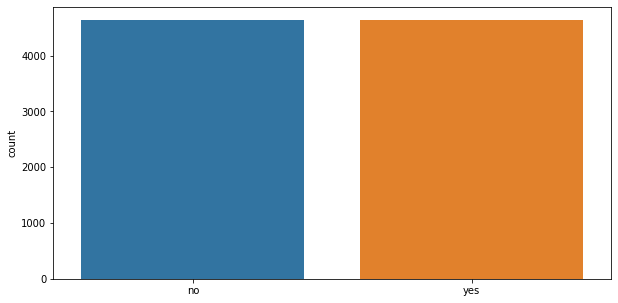

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y_resampled)
plt.show()